<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/predicciones-de-ventas/blob/main/Proyecto_2_base_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
filename = "G:/Mi unidad/Data CodingDojo/car_price.csv"
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


# Primera opción: conjunto de datos 1

1) Fuente de datos

[Kaggle](https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction)

2) Breve descripción de datos

Contiene informacion sobre autos usados como:
- Kilometraje
- Precio
- Añio de manufactura
- Asientos
- Tipo de combustible

3) ¿Cuál es el objetivo?

El objetivo es predecir el precio de un auto usado segun sus caracteristicas.

4) ¿Este es un problema de clasificación o regresión?

Como se busca identificar o predecir un precio, el cual es un valor continuo. Se trata de un problema de regresion.

5) ¿Cuántas características hay?

El conjunto de datos posee 8 caracteristicas.

6) ¿Cuántas filas de datos hay?

Tiene 5512 filas o registros.

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

El conjunto cuenta con columnas como el precio, el cual sera procesado para un mejor entendimiento a dolar.
tambien regularizar los valores de kilometros recorridos y la codificacion en general del conjunto.

# **Inicio EDA**

## Descripcion de columnas

- car_name: contiene el nombre del auto, sera transformada con OHE
- car_prices_in_rupee: contiene el valor del auto, sera transformado a dolar en nueva columna llamada "prices_in_dollar"
- kms_drive: se dejaran solo numeros
- fuel_tipe: tendra codificacion OHE
- transmision: tendra codificacion OHE
- ownership: caracteristica ordinal, debe ser transformada a numerica
- manufacture: Scaler
- engine: puede tener multiple valores distintos para mismo modelo de auto y anio, se eliminara
- seats: puede tener multiple valores distintos para mismo modelo de auto y anio, se eliminara

In [ ]:
df.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,prices_in_dollar
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,1,2017,12036.0
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,1,2021,15396.0
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,1,2016,19680.0
3,Honda Jazz VX CVT,26696,Petrol,Automatic,1,2018,9324.0
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,1,2016,6180.0


In [ ]:
#Eliminacion de columnas: ["Unnamed: 0","Seats","engine"]
df.drop(["Unnamed: 0","Seats","engine"], axis=1, inplace=True)

## Avances
- Columna Unnamed: 0, eliminada
- Columna kms_drive, se elimina "kms" y "," del valor. quedando solo numeros.
- Columna engine: Sera eliminada por tener valores que no reflejan la realidad, existe mucha variacion de cilindrada dentro del mismo modelo y anio lo cual sesgara el dato.
- Columna prices_in_rupee cambiada por prices_in_dollar
- Columna ordinal "ownership" transformada a numeros

**Columna ["kms_drive"]**
- se limpia valor numerico y se transforma columna a int

In [ ]:
df["kms_driven"] = df["kms_driven"].str.replace(" kms","") # eliminacion de letras kms
df["kms_driven"] = df["kms_driven"].str.replace(",","") # eliminacion de "," 
df["kms_driven"] = df["kms_driven"].astype(int) # transformacion de columna a integer

**Se identifican problemas con columna "engine" lo cual resulta en su exclusion del conjunto**
- Se identifican algunos modelos para su examinacion.

In [ ]:
df["car_name"].value_counts()

Maruti Alto 800 LXI          53
Maruti Swift VXI             46
Maruti Wagon R VXI BS IV     43
Maruti Swift Dzire VDI       42
Maruti Swift Dzire VXI       42
                             ..
Tata New Safari XT            1
Hyundai Creta 1.6 E Plus      1
Toyota Etios 2014-2016 GD     1
Mahindra Marazzo M8 8Str      1
BMW M Series M4 Coupe         1
Name: car_name, Length: 1896, dtype: int64

In [ ]:
df[(df["car_name"]== "Maruti Alto 800 LXI")&(df["manufacture"]==2017)]

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture
1094,Maruti Alto 800 LXI,3.23 Lakh,21949,Petrol,Manual,1st Owner,2017
1363,Maruti Alto 800 LXI,3.23 Lakh,21949,Petrol,Manual,1st Owner,2017
1684,Maruti Alto 800 LXI,3 Lakh,20000,Petrol,Manual,2nd Owner,2017
2670,Maruti Alto 800 LXI,2.51 Lakh,25919,Petrol,Manual,1st Owner,2017
2738,Maruti Alto 800 LXI,2.67 Lakh,7169,Petrol,Manual,1st Owner,2017
2748,Maruti Alto 800 LXI,2.49 Lakh,24000,Petrol,Manual,1st Owner,2017
2926,Maruti Alto 800 LXI,2.67 Lakh,26562,Petrol,Manual,1st Owner,2017
3134,Maruti Alto 800 LXI,2.50 Lakh,50000,Petrol,Manual,2nd Owner,2017
5022,Maruti Alto 800 LXI,2.67 Lakh,73505,Petrol,Manual,1st Owner,2017
5126,Maruti Alto 800 LXI,2.75 Lakh,22999,Petrol,Manual,1st Owner,2017


**Se puede apreciar que el modelo "Maruti Alto 800 LXI", hecho en 2017. tiene distintas cilindradas como asientos.**

**A continuacion se trabajara la columna "car_prices_in_rupee".**
- valores seran limpiados de cualquier caracter o letra.
- seran convertidos en dolares.

In [ ]:
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].str.replace("Crore","10000000")# se cambia unidad crore a numero
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].str.replace("Lakh","100000")# se cambia unidad lakh a numero
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].str.replace(",",".")# se normaliza separacion del numero

A continuacion creamos una lista dividida entre el precio en rupias y su unidad en miles (crore y lakh)

In [ ]:
price_separador = df["car_prices_in_rupee"].str.split(" ")

In [ ]:
price_separador

0       [10.03, 100000]
1       [12.83, 100000]
2       [16.40, 100000]
3        [7.77, 100000]
4        [5.15, 100000]
             ...       
5507    [28.90, 100000]
5508    [64.90, 100000]
5509    [13.75, 100000]
5510    [29.90, 100000]
5511    [31.90, 100000]
Name: car_prices_in_rupee, Length: 5512, dtype: object

**Ahora para tener el valor total en rupias, multiplicaremos cada elemento en:**
- Lakh: unidad de medida, equivale a 100000
- crore: unidad de medida, equivale a 10000000


In [ ]:
df["prices_in_dollar"] = 0
for x in range(0, 5512):
    if price_separador[x][1] != "": 
        df["prices_in_dollar"][x] = float(price_separador[x][0]) * float(price_separador[x][1])
    else:
        df["prices_in_dollar"][x] = float(price_separador[x][0]) * 1000

<ipython-input-301-fa1ab3f28541>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prices_in_dollar"][x] = float(price_separador[x][0]) * float(price_separador[x][1])


**A continuacion podemos apreciar con las 5 primeras y ultimas columnas que el resultado de la operacion fue exitoso**

In [ ]:
#transformacion de divisa en dolar
#df["prices_in_dollar"] = df["prices_in_dollar"] * 0.012

In [ ]:
df.sort_values("prices_in_dollar", ascending=False).head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,prices_in_dollar
5406,Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV,1.92 10000000,40000,Petrol,Automatic,1st Owner,2019,230400.0
4160,Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV,1.92 10000000,40000,Petrol,Automatic,1st Owner,2019,230400.0
3097,Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV,1.92 10000000,40000,Petrol,Automatic,1st Owner,2019,230400.0
892,Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV,1.92 10000000,40000,Petrol,Automatic,1st Owner,2019,230400.0
1331,Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV,1.92 10000000,40000,Petrol,Automatic,1st Owner,2019,230400.0


In [ ]:
df.sort_values("prices_in_dollar", ascending=True).head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,prices_in_dollar
3336,Maruti 800 Std,35.000,80000,Petrol,Manual,2nd Owner,1999,420.0
4668,Tata Nano Lx,35.000,50000,Petrol,Manual,2nd Owner,2011,420.0
4948,Tata Nano Lx BSIV,35.000,100000,Petrol,Manual,1st Owner,2012,420.0
957,Maruti Zen LXI,39.000,100000,Petrol,Manual,2nd Owner,2000,468.0
2204,Maruti 800 DX 5 Speed,40.000,80000,Petrol,Manual,1st Owner,2000,480.0


**Eliminacion de columna "car_prices_in_rupee"**

In [ ]:
df.drop("car_prices_in_rupee", axis=1, inplace=True)

**Transformacion de columna "ownership" a numero**

Tras inspeccion de columna "ownership", se decide eliminar registros cuyos valores sean "0th Owner"

In [ ]:
df = df[df["ownership"] != "0th Owner"]

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,prices_in_dollar


In [ ]:
df["ownership"].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '5th Owner'],
      dtype=object)

In [ ]:
df["ownership"].value_counts()

1    3736
2    1314
3     359
4      84
5      12
Name: ownership, dtype: int64

In [ ]:
df["ownership"].replace({"1st Owner":1,"2nd Owner":2,"3rd Owner":3,"4th Owner":4,"5th Owner":5}, inplace=True)

<ipython-input-332-41653b18654e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ownership"].replace({"1st Owner":1,"2nd Owner":2,"3rd Owner":3,"4th Owner":4,"5th Owner":5}, inplace=True)


# Visualizaciones

<AxesSubplot:ylabel='Frequency'>

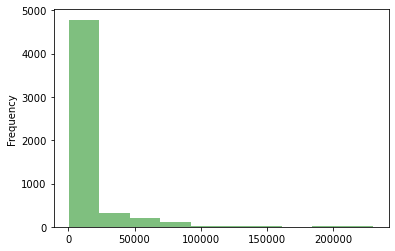

In [ ]:
df["prices_in_dollar"].plot(kind="hist",alpha=.5,color="green")

- Es posible apreciar que la mayoria de vehiculos esta bajo los 25 mil dolares

<AxesSubplot:ylabel='Frequency'>

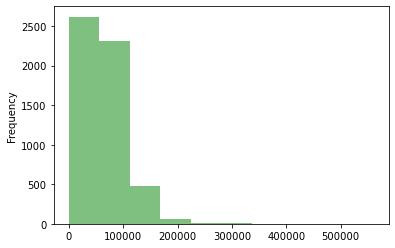

In [ ]:
df["kms_driven"].plot(kind="hist",alpha=.5,color="green")

- La mayoria tambien esta en un rango de kilometraje menor a los 100 mil kms

<AxesSubplot:ylabel='Frequency'>

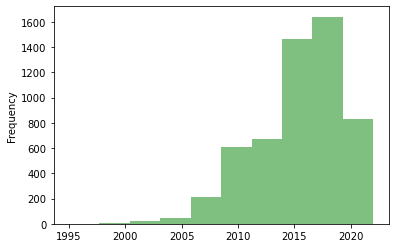

In [ ]:
df["manufacture"].plot(kind="hist",alpha=.5,color="green")

- Del universo de autos, se puede apreciar con son en su mayoria autos relativamente nuevos. de menos de 7 anios

<AxesSubplot:>

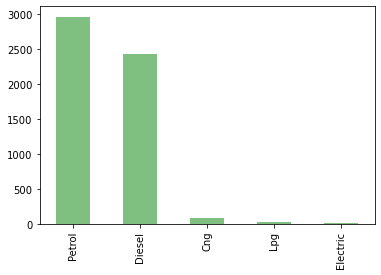

In [ ]:
df["fuel_type"].value_counts().plot(kind="bar",alpha=.5,color="green")

<AxesSubplot:>

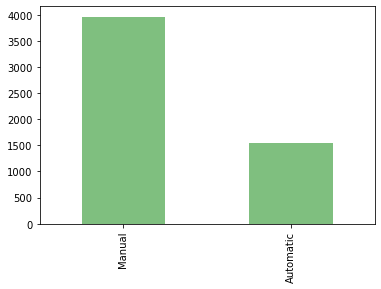

In [ ]:
df["transmission"].value_counts().plot(kind="bar",alpha=.5,color="green")

<AxesSubplot:>

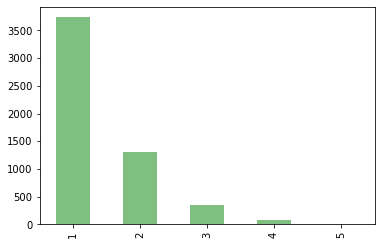

In [ ]:
df["ownership"].value_counts().plot(kind="bar",alpha=.5,color="green")

**A continuacion se muestra la correlacion de las caracteristicas del conjunto de dato**

<ipython-input-361-4ec21fe4b624>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


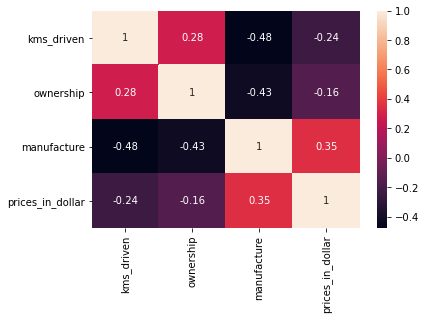

In [ ]:
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True,)

**De este heatmap podemos sugerir que:**
- existe una correlacion indirecta entre kms_driven y precio. mientras mas kms el precio es menor.
- existe una correlacion indirecta entre ownership y precio. mientras mas duenios, menor es el precio.
- existe una correlacion directa entre el anio del vehiculo y su precio.



C:\Users\felip\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

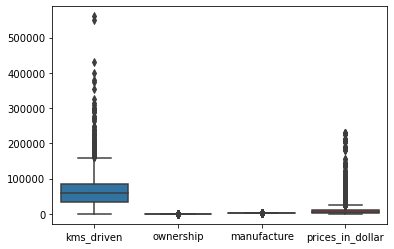

In [ ]:
sns.boxplot(x="kms_drive", y=data=df)